In [3]:
import os
os.chdir("..")

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
correlations = []
ablations = []
for path in ["baselines/NetDissect", "baselines/MILAN", "baselines/CLIP_Dissect", "ours/le_label", "ours/le_siglip"]:
    df = pd.read_csv("results/{}/resnet50_imagenet_layer4.csv".format(path))
    correlations.append(np.array(df["sim correlation"]))
    ablations.append(np.array(df["sim ablation(optim)"]))
correlations = np.concatenate(correlations)
ablations = np.concatenate(ablations)

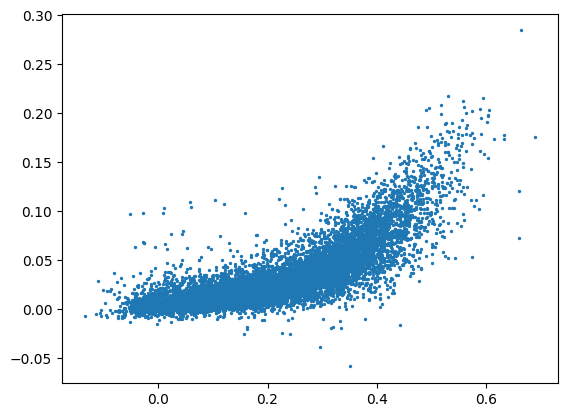

In [17]:
plt.scatter(correlations, ablations, s=2)

In [32]:
a, b = np.polyfit(correlations**2, ablations, deg=1)
print(a, b)

0.42312855550621464 0.005740243867236899


[-1.34602636e-01 -1.33778143e-01 -1.32953650e-01 -1.32129157e-01
 -1.31304663e-01 -1.30480170e-01 -1.29655677e-01 -1.28831184e-01
 -1.28006691e-01 -1.27182197e-01 -1.26357704e-01 -1.25533211e-01
 -1.24708718e-01 -1.23884225e-01 -1.23059731e-01 -1.22235238e-01
 -1.21410745e-01 -1.20586252e-01 -1.19761759e-01 -1.18937265e-01
 -1.18112772e-01 -1.17288279e-01 -1.16463786e-01 -1.15639293e-01
 -1.14814799e-01 -1.13990306e-01 -1.13165813e-01 -1.12341320e-01
 -1.11516827e-01 -1.10692333e-01 -1.09867840e-01 -1.09043347e-01
 -1.08218854e-01 -1.07394361e-01 -1.06569867e-01 -1.05745374e-01
 -1.04920881e-01 -1.04096388e-01 -1.03271895e-01 -1.02447401e-01
 -1.01622908e-01 -1.00798415e-01 -9.99739217e-02 -9.91494285e-02
 -9.83249353e-02 -9.75004421e-02 -9.66759489e-02 -9.58514557e-02
 -9.50269625e-02 -9.42024693e-02 -9.33779761e-02 -9.25534829e-02
 -9.17289897e-02 -9.09044965e-02 -9.00800033e-02 -8.92555101e-02
 -8.84310169e-02 -8.76065237e-02 -8.67820305e-02 -8.59575373e-02
 -8.51330441e-02 -8.43085

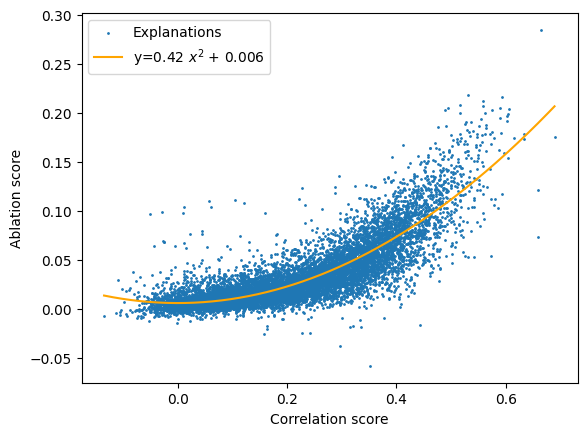

In [38]:
xs = (np.arange(1000)/1000)*(np.max(correlations) - np.min(correlations)) + np.min(correlations)
print(xs)
plt.scatter(correlations, ablations, s=1, label="Explanations")
plt.plot(xs, a*xs**2+b, c="orange", label="y=0.42 $x^2$ + 0.006")
plt.ylabel("Ablation score")
plt.xlabel("Correlation score")
plt.legend()